In [1]:
# 导入常用包
import xgboost as xgb
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# 数据集
cancer = datasets.load_breast_cancer()
X = cancer.data
Y = cancer.target

In [3]:
# 数据集的情况
# X.shape
# Y.shape
# X, Y

In [4]:
# 拆分训练集、测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5., random_state = 8)

In [5]:
xgb_train = xgb.DMatrix(X_train, label = Y_train)
xgb_test  = xgb.DMatrix(X_test,  label = Y_test)

In [6]:
params = {"objective": "binary:logistic",
          "booster": "gbtree",
          "eta": 0.1,
          "max_depth": 5
         }

num_round = 50

In [7]:
watchlist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [8]:
bst = xgb.train(params, xgb_train, num_round, watchlist) 

[0]	eval-error:0.03509	train-error:0.02418
[1]	eval-error:0.05263	train-error:0.01538
[2]	eval-error:0.07018	train-error:0.01319
[3]	eval-error:0.07895	train-error:0.00440
[4]	eval-error:0.07895	train-error:0.00440
[5]	eval-error:0.04386	train-error:0.00440
[6]	eval-error:0.05263	train-error:0.00440
[7]	eval-error:0.06140	train-error:0.00440
[8]	eval-error:0.05263	train-error:0.00440
[9]	eval-error:0.04386	train-error:0.00440
[10]	eval-error:0.04386	train-error:0.00440
[11]	eval-error:0.04386	train-error:0.00440
[12]	eval-error:0.04386	train-error:0.00440
[13]	eval-error:0.04386	train-error:0.00440
[14]	eval-error:0.03509	train-error:0.00440
[15]	eval-error:0.03509	train-error:0.00440
[16]	eval-error:0.03509	train-error:0.00440
[17]	eval-error:0.04386	train-error:0.00440
[18]	eval-error:0.04386	train-error:0.00440
[19]	eval-error:0.04386	train-error:0.00440
[20]	eval-error:0.04386	train-error:0.00440
[21]	eval-error:0.04386	train-error:0.00440
[22]	eval-error:0.04386	train-error:0.0044

In [9]:
# get_fscore采用默认的weight指标计算特征重要性

bst.get_score(importance_type="weight")
# bst.get_fscore()

# 降序显示
# importance = bst.get_score(importance_type="weight")
# importance = sorted(importance.items(), key = lambda x: x[1], reverse = True)
# importance

{'f22': 24,
 'f27': 42,
 'f13': 31,
 'f1': 38,
 'f6': 14,
 'f0': 3,
 'f7': 16,
 'f4': 11,
 'f11': 5,
 'f20': 13,
 'f23': 56,
 'f21': 44,
 'f18': 4,
 'f5': 6,
 'f15': 6,
 'f12': 4,
 'f14': 10,
 'f19': 4,
 'f10': 3,
 'f26': 15,
 'f28': 8,
 'f29': 7,
 'f24': 22,
 'f16': 1,
 'f3': 3,
 'f9': 9,
 'f8': 4,
 'f2': 1}

In [10]:
# total_gain = gain * weight
# bst.get_score(importance_type = "gain")
bst.get_score(importance_type = "total_gain")

{'f22': 1258.4756292146,
 'f27': 243.20585415000002,
 'f13': 58.78795041,
 'f1': 84.39384306479998,
 'f6': 122.37195240300002,
 'f0': 3.6538239110000004,
 'f7': 422.680410207,
 'f4': 4.398940087,
 'f11': 3.7740966050000004,
 'f20': 32.051757279200004,
 'f23': 469.1320059625001,
 'f21': 114.39452211259999,
 'f18': 8.13871385,
 'f5': 5.201644599,
 'f15': 3.3773617704000003,
 'f12': 2.3913688700000004,
 'f14': 7.2213765287,
 'f19': 7.591389172,
 'f10': 3.947612285,
 'f26': 64.1091777,
 'f28': 2.9816552401900003,
 'f29': 3.657013297,
 'f24': 20.453484242000002,
 'f16': 0.0649204254,
 'f3': 7.28776741,
 'f9': 8.622437242999998,
 'f8': 2.087030709,
 'f2': 0.344041944}

In [11]:
# bst.get_score(importance_type = "cover")
bst.get_score(importance_type = "total_cover")

{'f22': 1174.1206246499999,
 'f27': 1353.6097365100004,
 'f13': 840.26337532,
 'f1': 353.5747971600001,
 'f6': 231.70705701999995,
 'f0': 6.81152153,
 'f7': 557.19556285,
 'f4': 103.92826792000001,
 'f11': 53.66402295000001,
 'f20': 52.87916612999999,
 'f23': 1192.4740536900001,
 'f21': 603.0956798600004,
 'f18': 18.75723147,
 'f5': 49.43621255,
 'f15': 59.32206844000001,
 'f12': 77.94177531000001,
 'f14': 302.5405495,
 'f19': 70.18245392,
 'f10': 110.76232717,
 'f26': 260.46989049999996,
 'f28': 121.15559074999999,
 'f29': 48.375889980000004,
 'f24': 142.38754865,
 'f16': 21.1314545,
 'f3': 63.04397590000001,
 'f9': 40.30549384,
 'f8': 11.02852606,
 'f2': 2.02305269}

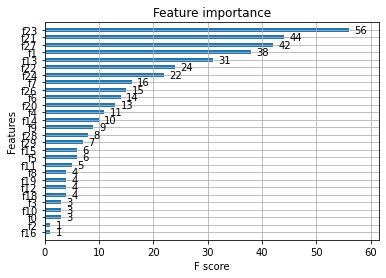

In [12]:
# 特征重要性可视化
import matplotlib.pyplot as plt

xgb.plot_importance(bst, height = 0.5)
plt.show()